![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

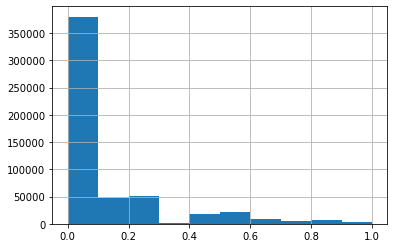

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
# Celda 1
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import stop_words
vect = CountVectorizer(stop_words="english", min_df=90, max_features=20)
X_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
#temp_A=X_dtm.todense()
#X_dtm.shape

model = RandomForestRegressor().fit(X_dtm, y_train)
y_pred = model.predict(X_test_dtm)

mse = metrics.mean_squared_error(y_pred, y_test.values)
print('MSE = {0}'.format(mse))

MSE = 0.03984039767723073


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 2
vect_c = CountVectorizer(stop_words="english", min_df=90, max_features=20,ngram_range=(1, 3))
X_dtm = vect_c.fit_transform(X_train)
X_test_dtm = vect_c.transform(X_test)
#temp_A=X_dtm.todense()
#X_dtm.shape

model_c = RandomForestRegressor().fit(X_dtm, y_train)
y_pred_c = model_c.predict(X_test_dtm)

mse_c = metrics.mean_squared_error(y_pred_c, y_test.values)
print('MSE = {0}'.format(mse_c))

MSE = 0.03984228877771452


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3


La función TfidfVectorizer nos permite conocer la importancia de una palabra, dentro de un conjunto de documentos, para esto calcula el termino de frecuencia (Tf) de dicha palabra en un documento específico, es decir, el número de veces que esta palabra aparece sobre el número total de términos del documento, luego de esto y con el fin de conocer la importancia de esta palabra en todo el conjunto de documentos, se utiliza la formula de 'idf' (Inverse Document Frecuency), esta formula lo que hace es penalizar una palabra cuando es utilizada en muchos documentos, reduciendo su importancia general. Finalmente se multiplica la frecuencia de la palabra en un documento (Tf), por la frecuencia inversa (Idf), para obtener la importancia de dicha palabra.

En la siguiente imagen se muestra una de las formas de calcular la importancia de la palabra i en el documento j: 
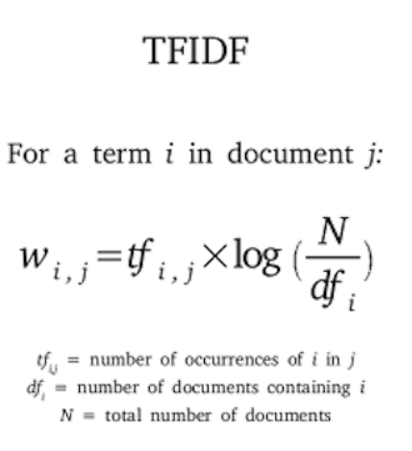
Donde: 
tf = es el número de veces que se repite una palabra i en un documento especifico j 
df = nos dice en cuantos documentos dentro del conjunto, está apareciendo la palabra i
N = corresponde al numero total de documentos 

En comparación con la función CountVectorizer, la función Tf-Idf, nos permite no solo enfocarnos en la frecuencia de las palabras en un conjutno de documentos, si no tambien en la importancia de estas palabras dentro de cada documento. De esta forma se podrían remover las palabras que son menos importantes para en análisis, haciendo que el modelo sea menos complejo al reducir el número de datos. 


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [31]:
# Celda 4
# Celda 4
vect_t = TfidfVectorizer(stop_words="english", min_df=90, max_features=20)
X_dtm = vect_t.fit_transform(X_train)
X_test_dtm = vect_t.transform(X_test)
#temp_A=X_dtm.todense()
#X_dtm.shape

model_t = RandomForestRegressor().fit(X_dtm, y_train)
y_pred_t = model_t.predict(X_test_dtm)

mse_t = metrics.mean_squared_error(y_pred_t, y_test.values)
print('MSE = {0}'.format(mse_t))

MSE = 0.03948829778557168


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

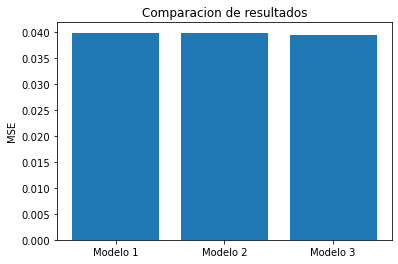

In [30]:
# Celda 5
import matplotlib.pyplot as plt

mse = 0.03984
mse_c = 0.03984
mse_t = MSE = 0.03946

eje_x = ['Modelo 1', 'Modelo 2', 'Modelo 3']
eje_y = [mse ,mse_c,mse_t]
 
plt.bar(eje_x, eje_y)
 
plt.ylabel('MSE')
plt.title('Comparacion de resultados')
plt.show()

Se obtuvieron resultados muy similares en los tres modelos, el primero y el segundo modelo tuvieron casi el mismo desempeno, con la diferencia de que el primero en el que no se establecio un tipo de n-grama se tiene un tiempo de corrida mucho menor al segundo en el que se utilizaron tri-gramas. Por el contrario en el último modelo, en el que se utilizó TfidfVectorizer, se obtiene un desempeño menor a los demás y adicionalmente tiene un tiempo de corrida mayor.